In [8]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import re


In [10]:
df = pd.read_csv('products.csv')
print(df.head())

                                               Title        Price  \
0  Karta graficzna MSI GeForce RTX 4070 Ti SUPER ...     3 699 zł   
1  Karta graficzna Gigabyte GeForce RTX 4060 Eagl...     1 359 zł   
2  Karta graficzna Gigabyte GeForce RTX 4060 Wind...  1 303,90 zł   
3  Karta graficzna ASRock Radeon RX 6800 XT Phant...  2 510,66 zł   
4  Karta graficzna Asus Dual GeForce RTX 4060 EVO...     1 299 zł   

  Długość karty Ilość pamięci RAM            Rodzaj chipsetu  \
0        242 mm             16 GB  GeForce RTX 4070 Ti Super   
1        272 mm              8 GB           GeForce RTX 4060   
2        192 mm              8 GB           GeForce RTX 4060   
3        330 mm             16 GB          Radeon RX 6800 XT   
4        227 mm              8 GB           GeForce RTX 4060   

  Taktowanie rdzenia w trybie boost  
0                          2655 MHz  
1                          2505 MHz  
2                          2475 MHz  
3                          2310 MHz  
4         

In [14]:
df['Price'] = df['Price'].astype(str)
df['Price'] = df['Price'].str.replace(r'\s+', '', regex=True)
df['Price'] = df['Price'].str.replace(',', '.')
df['Price'] = df['Price'].str.replace('zł', '')
df['Price'] = df['Price'].str.replace('od', '', regex=False)
df['Price'] = df['Price'].str.replace('od', '', regex=False)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [15]:
df['Price'] = df['Price'].fillna('').astype(str)
df['Price'] = df['Price'].str.replace(r'\s+', '', regex=True)
df['Price'] = df['Price'].str.replace(',', '.')
df['Price'] = df['Price'].str.replace('zł', '')
df['Price'] = df['Price'].str.replace('od', '', regex=False)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

df['Długość karty'] = df['Długość karty'].fillna('').astype(str)
df['Długość karty'] = df['Długość karty'].str.replace(' mm', '')
df['Długość karty'] = pd.to_numeric(df['Długość karty'], errors='coerce')

df['Ilość pamięci RAM'] = df['Ilość pamięci RAM'].fillna('').astype(str)
df['Ilość pamięci RAM'] = df['Ilość pamięci RAM'].str.replace(' GB', '')
df['Ilość pamięci RAM'] = pd.to_numeric(df['Ilość pamięci RAM'], errors='coerce')

df['Taktowanie rdzenia w trybie boost'] = df['Taktowanie rdzenia w trybie boost'].fillna('').astype(str)
df['Taktowanie rdzenia w trybie boost'] = df['Taktowanie rdzenia w trybie boost'].str.replace(' MHz', '')
df['Taktowanie rdzenia w trybie boost'] = df['Taktowanie rdzenia w trybie boost'].str.replace('Brak danych', '')
df['Taktowanie rdzenia w trybie boost'] = pd.to_numeric(df['Taktowanie rdzenia w trybie boost'], errors='coerce')

,Title,Price,Długość karty,Ilość pamięci RAM,Rodzaj chipsetu,Taktowanie rdzenia w trybie boost
0,Karta graficzna MSI GeForce RTX 4070 Ti SUPER ...,3699.00,242.0,16,GeForce RTX 4070 Ti Super,2655.0
1,Karta graficzna Gigabyte GeForce RTX 4060 Eagl...,1359.00,272.0,8,GeForce RTX 4060,2505.0
2,Karta graficzna Gigabyte GeForce RTX 4060 Wind...,1303.90,192.0,8,GeForce RTX 4060,2475.0
3,Karta graficzna ASRock Radeon RX 6800 XT Phant...,2510.66,330.0,16,Radeon RX 6800 XT,2310.0
4,Karta graficzna Asus Dual GeForce RTX 4060 EVO...,1299.00,227.0,8,GeForce RTX 4060,2535.0
...,...,...,...,...,...,...
295,Karta graficzna Asus TUF GeForce GTX 1660 Ti E...,1699.00,205.0,6,GeForce GTX 1660 Ti,1845.0
296,Karta graficzna XFX Speedster MERC 319 Radeon ...,2442.97,326.0,16,Radeon RX 7800 XT,2565.0
297,Karta graficzna Asus TUF GeForce GTX 1650 D6 G...,1139.00,204.0,4,GeForce GTX 1650,1680.0
298,Karta graficzna Zotac GeForce RTX 3060 Twin Ed...,1246.06,224.0,12,GeForce RTX 3060,1777.0


In [18]:
avg_price_chipset = df.groupby('Rodzaj chipsetu')['Price'].mean().reset_index().sort_values(by='Price', ascending=False)
print(avg_price_chipset)

              Rodzaj chipsetu         Price
27           GeForce RTX 4090  10263.770000
25           GeForce RTX 4080   5970.895000
26     GeForce RTX 4080 Super   5052.406471
28           Quadro RTX A4000   4981.990000
50         Radeon RX 7900 XTX   4455.151667
23        GeForce RTX 4070 Ti   4342.415000
40          Radeon RX 6650 XT   4080.140000
24  GeForce RTX 4070 Ti Super   3997.666667
18        GeForce RTX 3070 Ti   3754.843333
49          Radeon RX 7900 XT   3447.891250
22     GeForce RTX 4070 Super   2972.094286
17           GeForce RTX 3070   2936.465000
21           GeForce RTX 4070   2875.868095
48         Radeon RX 7900 GRE   2698.130000
43          Radeon RX 6800 XT   2454.830000
47          Radeon RX 7800 XT   2369.279231
16        GeForce RTX 3060 Ti   2202.375000
41          Radeon RX 6700 XT   2135.250000
20        GeForce RTX 4060 Ti   1997.659667
46          Radeon RX 7700 XT   1930.001111
29               Quadro T1000   1885.530000
42          Radeon RX 6750 XT   

In [21]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.Collecting seaborn
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.9 kB 495.5 kB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 2.5 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.3 MB/s eta 0:00:00




[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

Korelacja między ilością pamięci RAM a ceną: 0.72


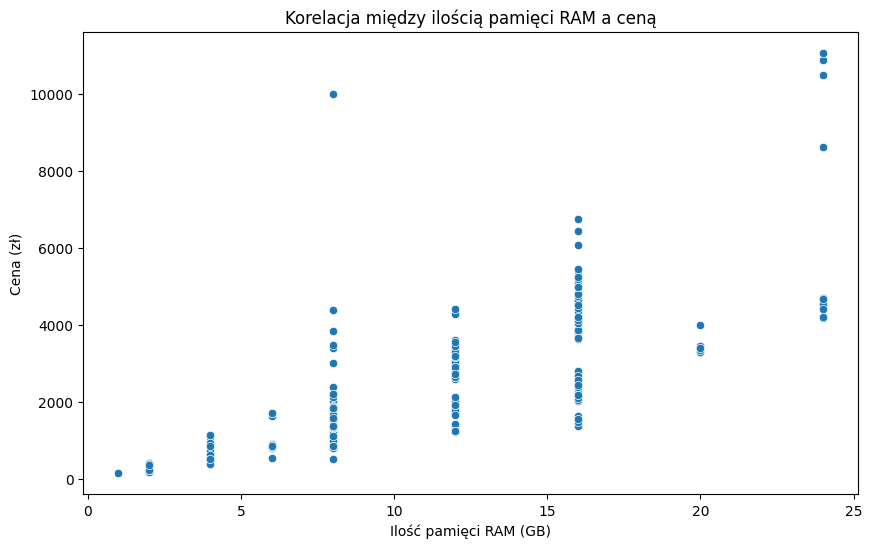

In [23]:
df_corr = df.dropna(subset=['Ilość pamięci RAM', 'Price'])

correlation = df_corr['Ilość pamięci RAM'].corr(df_corr['Price'])
print(f"Korelacja między ilością pamięci RAM a ceną: {correlation:.2f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_corr, x='Ilość pamięci RAM', y='Price')
plt.title('Korelacja między ilością pamięci RAM a ceną')
plt.xlabel('Ilość pamięci RAM (GB)')
plt.ylabel('Cena (zł)')
plt.show()

In [24]:
df_length = df.dropna(subset=['Długość karty'])

In [25]:
fig = px.histogram(df_length, x='Długość karty', nbins=20, title='Rozkład długości kart graficznych')
fig.show()

In [26]:
top5_expensive = df.sort_values(by='Price', ascending=False).head(5)
print(top5_expensive[['Title', 'Price']])

                                                 Title     Price
86   Karta graficzna Asus TUF Gaming GeForce RTX 40...  11060.32
73   Karta graficzna Asus ROG Strix GeForce RTX 409...  10879.00
30   Karta graficzna MSI GeForce RTX 4090 Suprim Li...  10499.00
264  Karta graficzna MSI Radeon RX 6650 XT Mech 2X ...   9999.00
37   Karta graficzna MSI GeForce RTX 4090 Ventus 3X...   8616.76


In [27]:
df_boost = df.dropna(subset=['Taktowanie rdzenia w trybie boost'])

In [28]:
fig = px.box(df_boost, x='Rodzaj chipsetu', y='Taktowanie rdzenia w trybie boost', title='Rozkład taktowania rdzenia w trybie boost dla każdego chipsetu')
fig.update_layout(xaxis_title='Rodzaj chipsetu', yaxis_title='Taktowanie rdzenia (MHz)', xaxis_tickangle=-45)
fig.show()